In this project I worked with the UCI Machine Learning Repository adult dataset. I attempted to predict if people in the data set belong in a certain class by salary, either making <=50k or >50k per year.

The following steps involves data cleaning, exploratory analysis, data visualization and Building Logistic regression model to predict the variable income and calculation of accuracy of the model built.

In [ ]:
#importing dataset
adult <- read.csv(file = "adult_sal.csv", sep=',')

In [7]:
head(adult)  #head of the dataset adult

X,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
<int>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
str(adult)  # structure of dataset

'data.frame':	32561 obs. of  16 variables:
 $ X            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 9 levels "?","Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation   : Factor w/ 15 levels "?","Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 

In [8]:
#dropping x column
install.packages("dplyr")
library(dplyr)
adult<- adult[-c(1)]


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [9]:
head(adult)   # head of the updated dataset

age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [10]:
str(adult) # structure of the updated dataset

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 9 levels "?","Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation   : Factor w/ 15 levels "?","Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40

In [11]:
summary(adult)  # summary of the updated dataset

      age                 type_employer       fnlwgt       
 Min.   :17.00   Private         :22696   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00   Local-gov       : 2093   Median : 178356  
 Mean   :38.58   ?               : 1836   Mean   : 189778  
 3rd Qu.:48.00   State-gov       : 1298   3rd Qu.: 237051  
 Max.   :90.00   Self-emp-inc    : 1116   Max.   :1484705  
                 (Other)         :  981                    
        education     education_num                    marital     
 HS-grad     :10501   Min.   : 1.00   Divorced             : 4443  
 Some-college: 7291   1st Qu.: 9.00   Married-AF-spouse    :   23  
 Bachelors   : 5355   Median :10.00   Married-civ-spouse   :14976  
 Masters     : 1723   Mean   :10.08   Married-spouse-absent:  418  
 Assoc-voc   : 1382   3rd Qu.:12.00   Never-married        :10683  
 11th        : 1175   Max.   :16.00   Separated            : 1025  
 (Other)     : 5134                   Widowe

In [13]:
#frequency of the type_employer column
table(adult$type_employer)


               ?      Federal-gov        Local-gov     Never-worked 
            1836              960             2093                7 
         Private     Self-emp-inc Self-emp-not-inc        State-gov 
           22696             1116             2541             1298 
     Without-pay 
              14 

In [15]:
#combining columns without_pay and never_worked into one column(unemployed)
unemp <- function(job){
  job <- as.character(job)
  if (job=='Never-worked' | job=='Without-pay'){
    return('Unemployed')
  }else{
    return(job)
  }
}



In [16]:
adult$type_employer <- sapply(adult$type_employer, unemp)

In [17]:
table(adult$type_employer)


               ?      Federal-gov        Local-gov          Private 
            1836              960             2093            22696 
    Self-emp-inc Self-emp-not-inc        State-gov       Unemployed 
            1116             2541             1298               21 

In [18]:
#combining columns self-emp-inc and self-emp-not-inc into one column(self-emp)
selfemp <- function(job){
  job <- as.character(job)
  if (job=='Self-emp-inc' | job=='Self-emp-not-inc'){
    return('self-emp')
  }else{
    return(job)
  }
}

In [19]:
adult$type_employer <- sapply(adult$type_employer, selfemp)
table(adult$type_employer)


          ? Federal-gov   Local-gov     Private    self-emp   State-gov 
       1836         960        2093       22696        3657        1298 
 Unemployed 
         21 

In [20]:
#combining columns Local-gov and state-gov into one column(SL-gov)
govemp <- function(job){
  job <- as.character(job)
  if (job=='Local-gov' | job=='State-gov'){
    return('SL-gov')
  }else{
    return(job)
  }
}

In [21]:
adult$type_employer <- sapply(adult$type_employer, govemp)
table(adult$type_employer)


          ? Federal-gov     Private    self-emp      SL-gov  Unemployed 
       1836         960       22696        3657        3391          21 

In [22]:
#converting marital column into 3 levels-married,not-married,never-married

group_marital <- function(mar){
  mar <- as.character(mar)
  if (mar=='Separated' | mar=='Divorced' | mar=='Widowed'){
    return('Not-Married')
  }
  else if(mar=='Never-married'){
    return(mar)
  }
  else{
    return('Married')
  }
}

In [23]:
adult$marital <- sapply(adult$marital, group_marital)
table(adult$marital)


      Married Never-married   Not-Married 
        15417         10683          6461 

In [24]:
#grouping the country column into continets
Asia <- c('China','Hong','India','Iran','Cambodia','Japan', 'Laos' ,
          'Philippines' ,'Vietnam' ,'Taiwan', 'Thailand')

North.America <- c('Canada','United-States','Puerto-Rico' )

Europe <- c('England' ,'France', 'Germany' ,'Greece','Holand-Netherlands','Hungary',
            'Ireland','Italy','Poland','Portugal','Scotland','Yugoslavia')

Latin.and.South.America <- c('Columbia','Cuba','Dominican-Republic','Ecuador',
                             'El-Salvador','Guatemala','Haiti','Honduras',
                             'Mexico','Nicaragua','Outlying-US(Guam-USVI-etc)','Peru',
                             'Jamaica','Trinadad&Tobago')
Other <- c('South')

In [25]:
group_country <- function(ctry){
  if (ctry %in% Asia){
    return('Asia')
  }else if (ctry %in% North.America){
    return('North.America')
  }else if (ctry %in% Europe){
    return('Europe')
  }else if (ctry %in% Latin.and.South.America){
    return('Latin.and.South.America')
  }else{
    return('Other')      
  }
}

In [26]:
adult$country <- sapply(adult$country, group_country)
table(adult$country)


                   Asia                  Europe Latin.and.South.America 
                    671                     521                    1301 
          North.America                   Other 
                  29405                     663 

In [27]:
str(adult)  #structure of updated dataframe

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: chr  "SL-gov" "self-emp" "Private" "Private" ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : chr  "Never-married" "Married" "Not-Married" "Married" ...
 $ occupation   : Factor w/ 15 levels "?","Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $ country      : 

In [28]:
#installing Amelia package
install.packages('Amelia',repos = 'http://cran.us.r-project.org')
library('Amelia')

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
also installing the dependency ‘RcppArmadillo’

Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.5, built: 2018-05-07)
## Copyright (C) 2005-2019 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


In [29]:
#converting th value ? into NA within the adult data frame
adult[adult == '?'] <- NA

In [30]:
#correcting the column datatype from character to factor
adult$type_employer <- factor(adult$type_employer)
adult$country <- factor(adult$country)
adult$marital <- factor(adult$marital)
adult$occupation <- factor(adult$occupation)

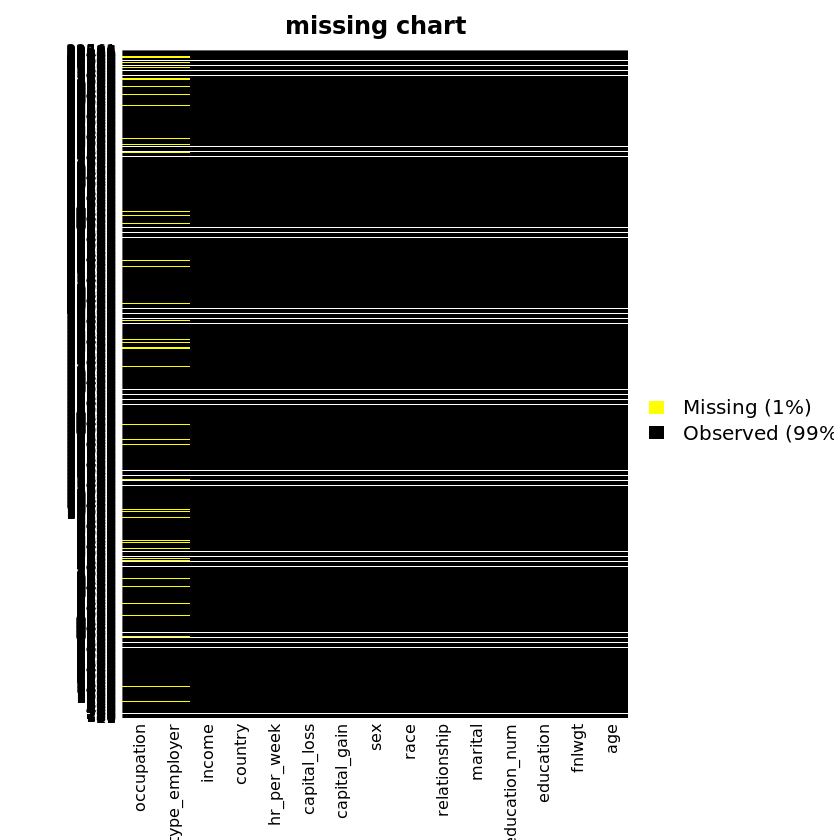

In [31]:
# looking at the missing values within adult data frame using missmap fucntion
missmap(adult,main= 'missing chart',col=c('yellow','black'),legened=FALSE)

In [32]:
#removing the missing values
adult<-na.omit(adult)

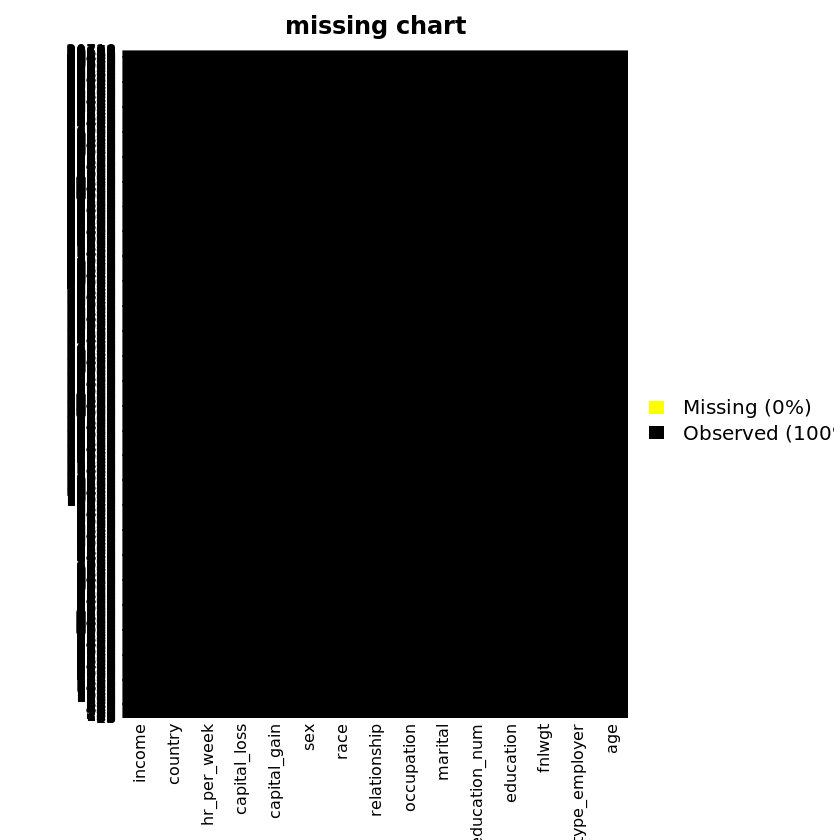

In [33]:
# looking at the missing values within adult data frame using missmap fucntion 
missmap(adult,main= 'missing chart',col=c('yellow','black'),legened=FALSE)

In [34]:
library(ggplot2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


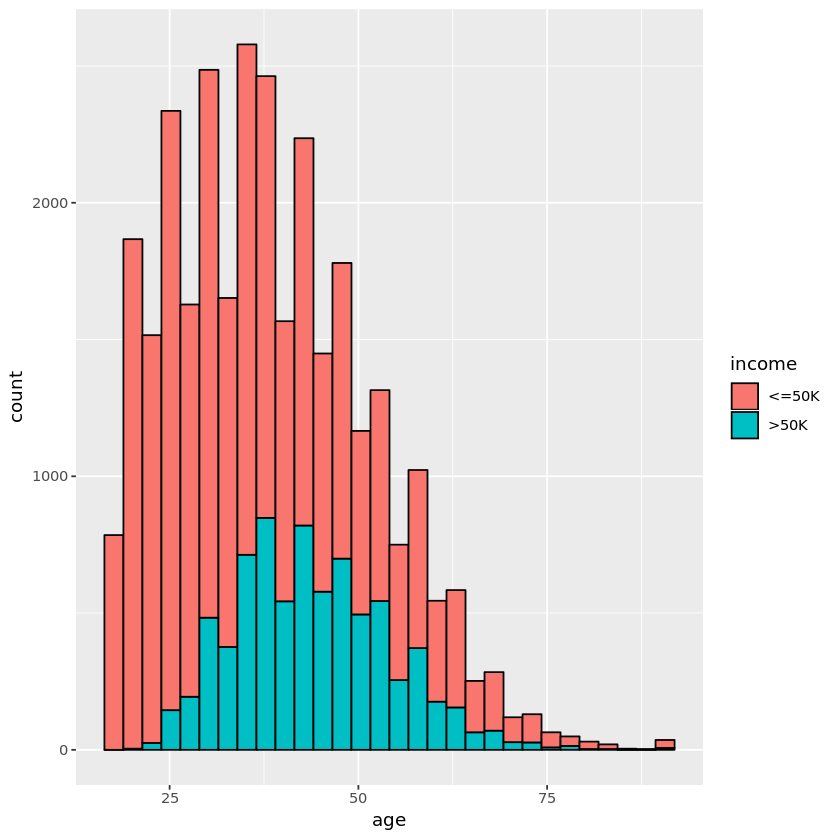

In [35]:
#data visualization
#histogram of ages, colored by income
print(ggplot(adult,aes(age))+ geom_histogram(aes(fill=income),color='black'))


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


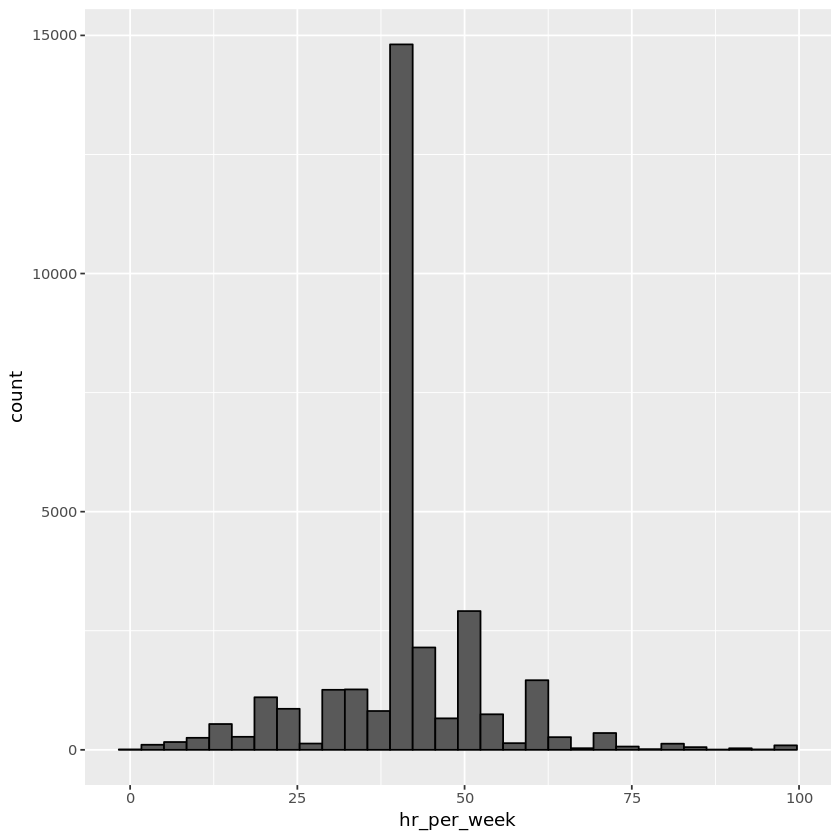

In [36]:
#histogram of hours worked per week
print(ggplot(adult, aes(hr_per_week))+geom_histogram(color='black'))

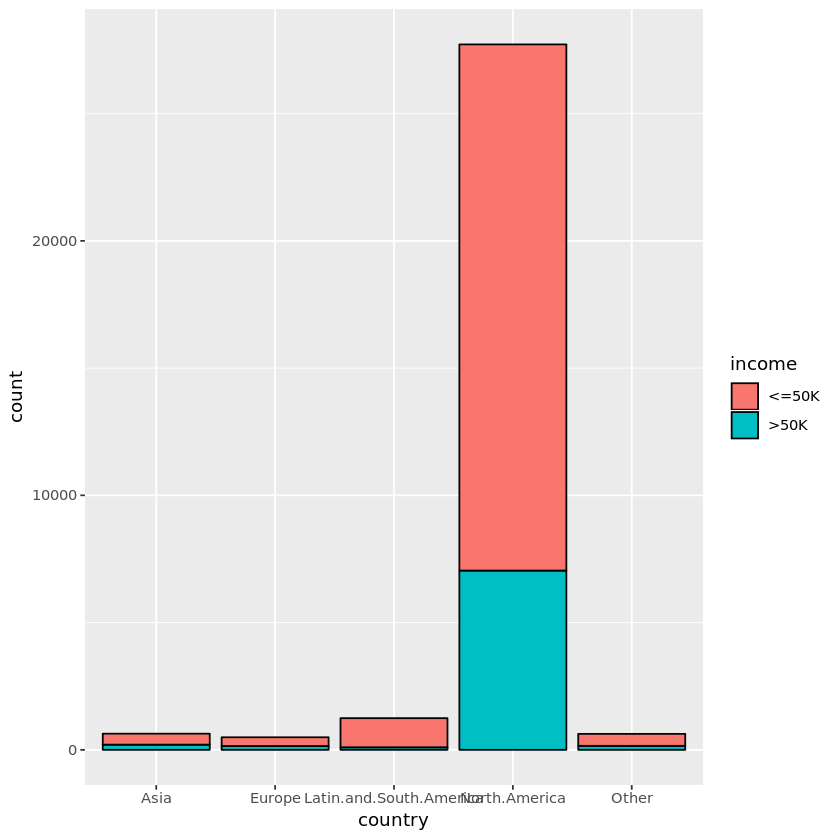

In [37]:
#barplot of country with color fill by income class
ggplot(adult,aes(country))+ geom_bar(aes(fill=income),color='black')

In [39]:
install.packages("caTools")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
also installing the dependency ‘bitops’



In [40]:
#splitting data into train and test
library(caTools)
split_data<- sample.split(adult$income, SplitRatio = 0.7)
train_data= subset(adult, split_data==TRUE) # train dataset
test_data= subset(adult, split_data==FALSE) #test dataset

In [41]:
#building model
final_logitmodel<- glm(income~., family=binomial(link = 'logit'), data=train_data)
summary(final_logitmodel)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = income ~ ., family = binomial(link = "logit"), 
    data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1090  -0.5189  -0.1909   0.0000   3.6867  

Coefficients: (1 not defined because of singularities)
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    -5.869e+00  4.358e-01 -13.467  < 2e-16 ***
age                             2.663e-02  2.014e-03  13.224  < 2e-16 ***
type_employerPrivate           -3.637e-01  1.125e-01  -3.232  0.00123 ** 
type_employerself-emp          -6.790e-01  1.245e-01  -5.453 4.95e-08 ***
type_employerSL-gov            -6.057e-01  1.263e-01  -4.795 1.63e-06 ***
type_employerUnemployed        -1.511e+01  5.918e+02  -0.026  0.97963    
fnlwgt                          6.622e-07  2.053e-07   3.226  0.00126 ** 
education11th                  -4.210e-02  2.478e-01  -0.170  0.86509    
education12th                   9.736e-02  3.342e-01   0.291  0.77082   

In [42]:
#using step function to create new model
step_model<-step(final_logitmodel)

Start:  AIC=14073.61
income ~ age + type_employer + fnlwgt + education + education_num + 
    marital + occupation + relationship + race + sex + capital_gain + 
    capital_loss + hr_per_week + country



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess


Step:  AIC=14073.61
income ~ age + type_employer + fnlwgt + education + marital + 
    occupation + relationship + race + sex + capital_gain + capital_loss + 
    hr_per_week + country



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                Df Deviance   AIC
<none>                13966 14074
- race           4    13974 14074
- fnlwgt         1    13976 14082
- country        4    13990 14090
- marital        2    14005 14109
- type_employer  4    14017 14117
- sex            1    14059 14165
- age            1    14142 14248
- capital_loss   1    14180 14286
- relationship   5    14215 14313
- hr_per_week    1    14230 14336
- occupation    13    14420 14502
- education     15    14663 14741
- capital_gain   1    15175 15281


In [43]:
summary(step_model) #summary of step model


Call:
glm(formula = income ~ age + type_employer + fnlwgt + education + 
    marital + occupation + relationship + race + sex + capital_gain + 
    capital_loss + hr_per_week + country, family = binomial(link = "logit"), 
    data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1090  -0.5189  -0.1909   0.0000   3.6867  

Coefficients:
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    -5.869e+00  4.358e-01 -13.467  < 2e-16 ***
age                             2.663e-02  2.014e-03  13.224  < 2e-16 ***
type_employerPrivate           -3.637e-01  1.125e-01  -3.232  0.00123 ** 
type_employerself-emp          -6.790e-01  1.245e-01  -5.453 4.95e-08 ***
type_employerSL-gov            -6.057e-01  1.263e-01  -4.795 1.63e-06 ***
type_employerUnemployed        -1.511e+01  5.918e+02  -0.026  0.97963    
fnlwgt                          6.622e-07  2.053e-07   3.226  0.00126 ** 
education11th                  -4

In [44]:
#confusion matrix
predicted_vales<- predict(final_logitmodel,test_data,type='response')

table(test_data$income,predicted_vales>0.5)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

       
        FALSE TRUE
  <=50K  6386  534
  >50K    897 1398

In [45]:
#accuracy of the model
(6386+1398)/(6386+534+897+1398)

[1] 0.8447097

In [47]:
#precision of the model
precision<- 6386/(6386+897)
precision

[1] 0.8768365

In [48]:
#recall of the model
recall<-6386/(6386+534)
recall

[1] 0.9228324